In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
!pip install scikit-learn==1.6.0
from sklearn.model_selection import train_test_split

In [2]:
Ticker = 'CL=F'
gas = yf.download(Ticker, start = '2005-11-01', end = '2025-12-01', auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [3]:
oil = gas['Close':'Date'].pct_change()
oil.dropna()

Ticker,CL=F
Date,
2005-11-02,-0.001671
2005-11-03,0.033975
2005-11-04,-0.019424
2005-11-07,-0.018323
2005-11-08,0.004036
...,...
2025-11-21,-0.018262
2025-11-24,0.013434
2025-11-25,-0.015126


In [4]:
oil = oil.resample('MS').last()
oil

Ticker,CL=F
Date,
2005-11-01,0.014513
2005-12-01,0.011936
2006-01-01,-0.006291
2006-02-01,0.006721
2006-03-01,-0.007744
...,...
2025-07-01,-0.010571
2025-08-01,-0.009133
2025-09-01,-0.017021


In [24]:
oil

Ticker,CL=F
Date,
2005-11-01,0.014513
2005-12-01,0.011936
2006-01-01,-0.006291
2006-02-01,0.006721
2006-03-01,-0.007744
...,...
2025-07-01,-0.010571
2025-08-01,-0.009133
2025-09-01,-0.017021


In [6]:
oil = oil.dropna()

In [7]:
oil.tail()

Ticker,CL=F
Date,
2025-07-01,-0.010571
2025-08-01,-0.009133
2025-09-01,-0.017021
2025-10-01,0.006769
2025-11-01,-0.001705


In [8]:
oil.shape

(241, 1)

In [9]:
Inflation = pd.read_csv('Inflation_2000-2025.csv', index_col=0)

In [10]:
Inflation = Inflation.drop(columns=Inflation.columns[1::])

In [23]:
Inflation

,Inflation
Date,
2005-11-01,-0.029
2005-12-01,0.176
2006-01-01,-0.100
2006-02-01,-0.056
2006-03-01,0.029
...,...
2025-07-01,0.074
2025-08-01,0.034
2025-09-01,-1.000


In [12]:
Inflation.shape

(241, 1)

In [ ]:
type(Inflation)

In [13]:
oil.shape

(241, 1)

In [14]:
Inflation.index = pd.to_datetime(Inflation.index)
oil.index = pd.to_datetime(oil.index)

gas_inf = Inflation.join(oil, how='inner')
gas_inf = gas_inf.dropna()

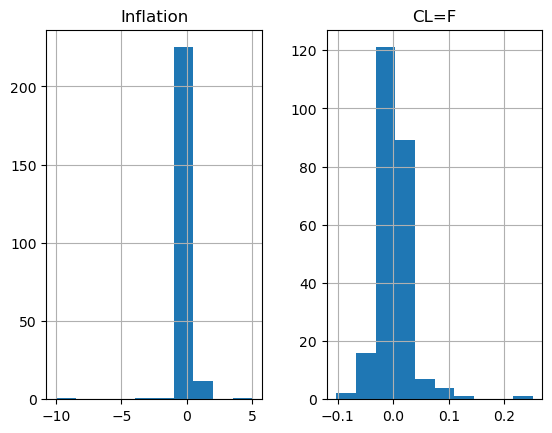

In [15]:
viz = gas_inf[['Inflation', 'CL=F']]
viz.hist()
plt.show()

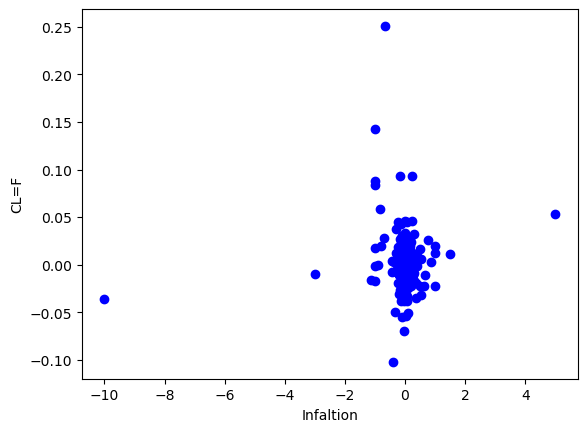

In [59]:
plt.scatter(gas_inf['Inflation'], gas_inf['CL=F'], color = 'blue')
plt.xlabel('Infaltion')
plt.ylabel('CL=F')
plt.show()

In [53]:
X = gas_inf['Inflation'].to_numpy()
y = gas_inf['CL=F'].to_numpy()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state = 42)

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train)
print('Coefficients', reg.coef_[0])
print('Intercept:', reg.intercept_)

Coefficients 0.00272606432281079
Intercept: 0.0009873851151505986


Text(0, 0.5, 'Oil')

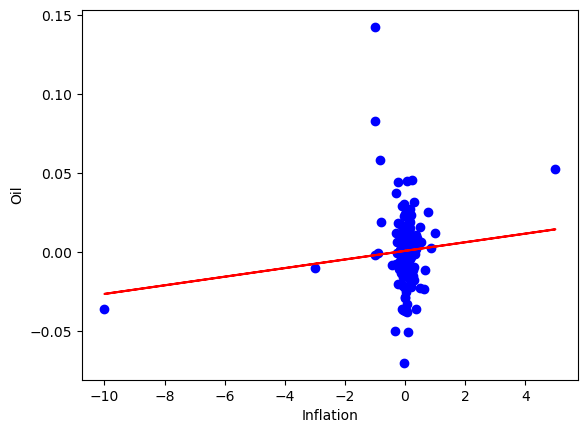

In [56]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.coef_ * X_train + reg.intercept_, '-r')
plt.xlabel('Inflation')
plt.ylabel('Oil')


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test.reshape(-1,1))

print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean Squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2-Score: %.2f' % r2_score(y_test, y_pred))


Mean absolute error: 0.02
Mean Squared error: 0.00
Root mean squared error: 0.04
R2-Score: -0.01


Text(0, 0.5, 'Oil')

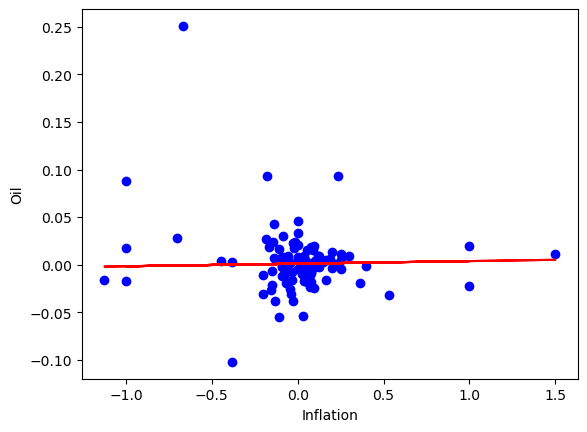

In [58]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, reg.coef_ * X_test + reg.intercept_, '-r')
plt.xlabel('Inflation')
plt.ylabel('Oil')